# Telecom Churn Prediction Project

In [2]:
#Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
#  df is my DataFrame
df= pd.read_csv("Dataset/customer_churn.csv")

In [498]:
df.head()


,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [499]:
df.tail()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.98,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.21,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.32,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.64,0
3149,8,1,11,2,1792,25,7,9,3,1,1,30,100.68,1


In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             3150 non-null   int64  
 1   Complaints               3150 non-null   int64  
 2   Subscription Length      3150 non-null   int64  
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [501]:
df.shape

(3150, 14)

### Statistical description

In [502]:
df.describe()


,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


### Null Cells

In [503]:
df.isna().sum()

Call Failure               0
Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

### Date types

In [504]:
df.dtypes

Call Failure                 int64
Complaints                   int64
Subscription Length          int64
Charge Amount                int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

## Variables relationship and visual exploration

### Frecuency of use by age groups

In [505]:
df.groupby('Age Group')[['Age']].agg(['min','max'])


Age    
          min max
Age Group        
1          15  15
2          25  25
3          30  30
4          45  45
5          55  55

In [506]:
#The resulting output will be a new DataFrame that displays the mean values of 'Frequency of SMS' and 'Frequency of use' for each unique value in the 'Age Group' column.
# This can help analyze the average frequency of SMS and call usage among different age groups.

df.groupby('Age Group')[['Frequency of SMS','Frequency of use']].mean()


,Frequency of SMS,Frequency of use
Age Group,,
1,20.195122,76.642276
2,75.499518,72.075217
3,90.042807,68.442807
4,42.053165,60.562025
5,28.247059,77.523529


### Which age groups send more text messages than phone calls?

In [507]:
#This command groups the data by 'Age' and then calculates the average of 'Frequency of use' (total number of calls) and 'Frequency of SMS' (total number of text messages) for each age group.
df_grouped = df.groupby('Age Group')[['Frequency of use', 'Frequency of SMS']].mean()

In [508]:
# Find age groups where the average 'Frequency of SMS' is greater than the average 'Frequency of use'
#This command selects the age groups for which the average 'Frequency of SMS' is higher than the average 'Frequency of use'
more_texts_than_calls = df_grouped[df_grouped['Frequency of SMS'] > df_grouped['Frequency of use']]


In [509]:
print(more_texts_than_calls)


           Frequency of use  Frequency of SMS
Age Group                                    
2                 72.075217         75.499518
3                 68.442807         90.042807


### Explore the relationship between complaints and churn

In [510]:
#We group the data by complaint status and calculate the average unsubscribe for each group.
#If the value is higher for customers who have complaints,
#this could indicate that customer complaints are a strong indicator of churn.
complaints_churn_rate = df.groupby('Complaints')['Churn'].mean()
print(complaints_churn_rate)

Complaints
0    0.101409
1    0.829876
Name: Churn, dtype: float64


### Influence of age on churn rate

In [511]:
# we aggregate the data by age group and calculate the average churn rate.
#If certain age groups have a significantly higher unsubscribe rate,
# this could indicate that age is a strong factor in unsubscribing
age_churn_rate = df.groupby('Age')['Churn'].mean()
print(age_churn_rate)

Age
15    0.000000
25    0.177435
30    0.161404
45    0.200000
55    0.011765
Name: Churn, dtype: float64



### Influence of the amount of fees on the churn rate

In [512]:
#, nous regroupons les données par montant des frais et calculons le taux moyen de désabonnement. 
#Si les clients qui paient des frais plus élevés ont tendance à se désabonner plus souvent, 
#cela pourrait indiquer que le montant des frais est un facteur important de désabonnement.
charge_churn_rate = df.groupby('Charge Amount')['Churn'].mean()
print(charge_churn_rate)

Charge Amount
0     0.238122
1     0.069692
2     0.058228
3     0.035176
4     0.013158
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
Name: Churn, dtype: float64


### Influence of call failures on unsubscription

In [513]:
#We aggregate the data by the number of call failures and calculate the average churn rate.
#If customers who experience more call failures tend to unsubscribe more often,
# this could indicate that call failures are a churn factor.
call_failures_churn_rate = df.groupby('Call Failure')['Churn'].mean()
print(call_failures_churn_rate)

Call Failure
0     0.199430
1     0.099174
2     0.138686
3     0.127660
4     0.142857
5     0.184426
6     0.149068
7     0.138554
8     0.134615
9     0.140940
10    0.129032
11    0.128000
12    0.123711
13    0.111111
14    0.176471
15    0.086957
16    0.164179
17    0.088889
18    0.169811
19    0.121212
20    0.162162
21    0.137931
22    0.190476
23    0.280000
24    0.187500
25    0.190476
26    0.235294
27    0.153846
28    0.352941
29    0.285714
30    0.187500
31    0.166667
32    0.125000
33    0.333333
34    0.333333
35    0.000000
36    0.000000
Name: Churn, dtype: float64


### Impact of the tariff plan on the churn rate



In [514]:
#We aggregate the data by rate plan and calculate the average churn rate.
#If the churn rate is significantly different between the two plans,
#this could indicate that the type of pricing plan is a major factor in churn.
tariff_churn_rate = df.groupby('Tariff Plan')['Churn'].mean()
print(tariff_churn_rate)

Tariff Plan
1    0.16833
2    0.02449
Name: Churn, dtype: float64


## Visualisation

In [515]:
import matplotlib.pyplot as plt
import seaborn as sns


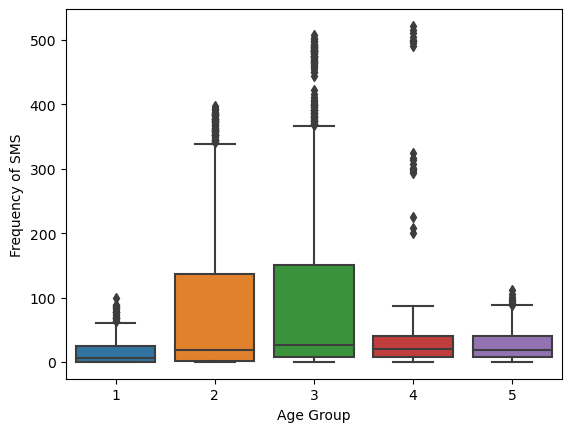

In [516]:
#the distribution of 'Frequency of SMS' values for each unique category in the 'Age Group' column
g=sns.boxplot(data=df,x='Age Group',y='Frequency of SMS')


Text(0.5, 1.0, 'Frecuency of SMS by age distribution')

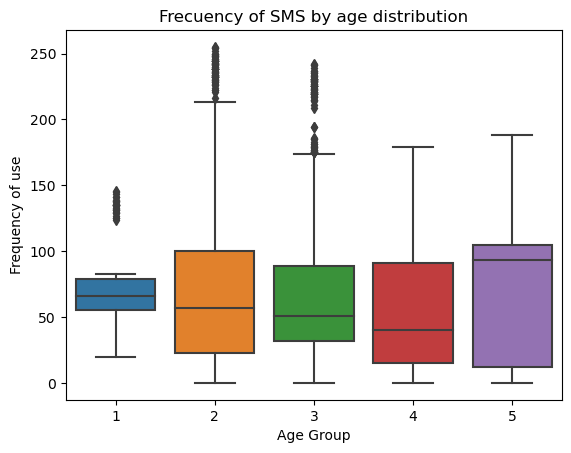

In [517]:
g=sns.boxplot(data=df,x='Age Group',y='Frequency of use')
g.set_title('Frecuency of SMS by age distribution')

##### Observation: Age Groups 4 and 5 uses comparatively much less SMS than Calls

### Seconds of use by Age Group and Tariff Plan

Text(0.5, 1.0, 'Seconds of Use by Age Group and Tariff')

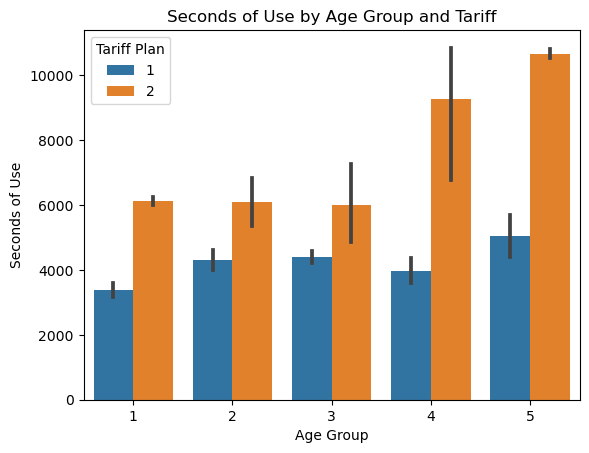

In [518]:
g=sns.barplot(data=df,x='Age Group',y='Seconds of Use',hue='Tariff Plan')
g.set_title('Seconds of Use by Age Group and Tariff')

### All Failure, Complains and Subscription Length vs Churn/No Churn

[Text(0, 0, 'No Churn'), Text(1, 0, 'Churn')]

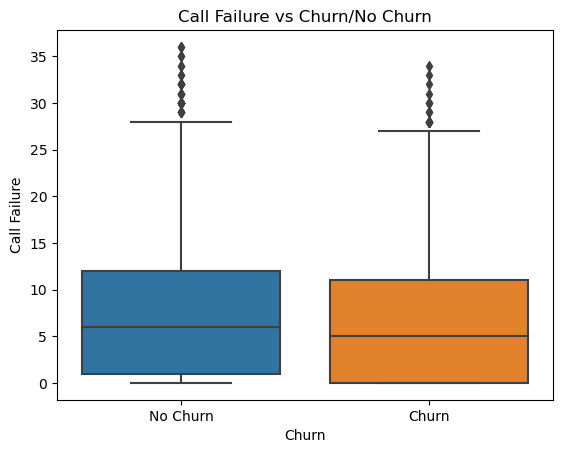

In [519]:
g=sns.boxplot(data=df,y='Call Failure',x='Churn')
g.set_title('Call Failure vs Churn/No Churn')
g.set_xticklabels(['No Churn','Churn'])

[Text(0, 0, 'No Churn'), Text(1, 0, 'Churn')]

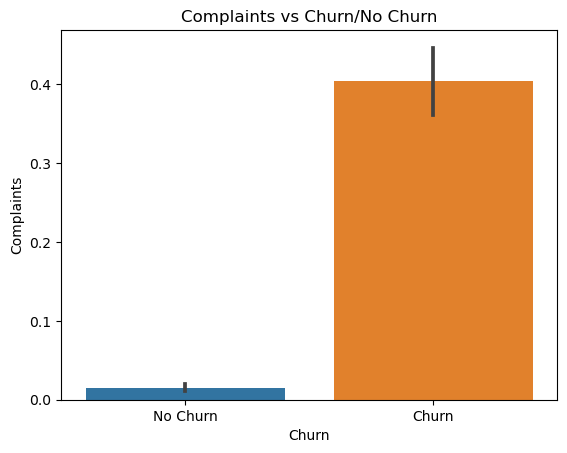

In [520]:
g=sns.barplot(data=df,y='Complaints',x='Churn')
g.set_title('Complaints vs Churn/No Churn')
g.set_xticklabels(['No Churn','Churn'])

[Text(0, 0, 'No Churn'), Text(1, 0, 'Churn')]

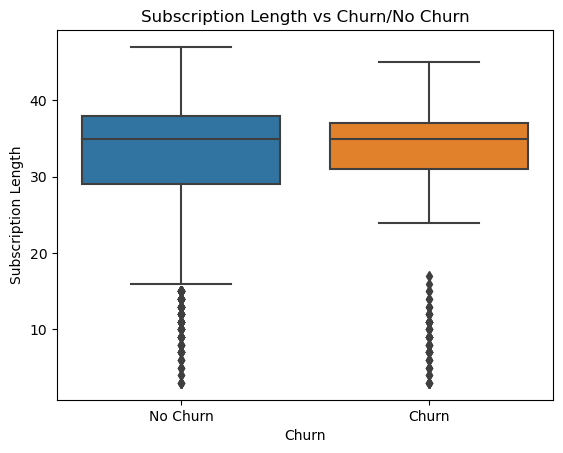

In [521]:
g=sns.boxplot(data=df,y='Subscription Length',x='Churn')
g.set_title('Subscription Length vs Churn/No Churn')
g.set_xticklabels(['No Churn','Churn'])

### Observations

##### All the customer that Churn had complains.

##### The customer mostly Churn between 32 and 38 months. The median is about 35 months.

##### The median of Call failures in customers that churns is about 5.

### Correlation between possible features and Features with Target

<Axes: >

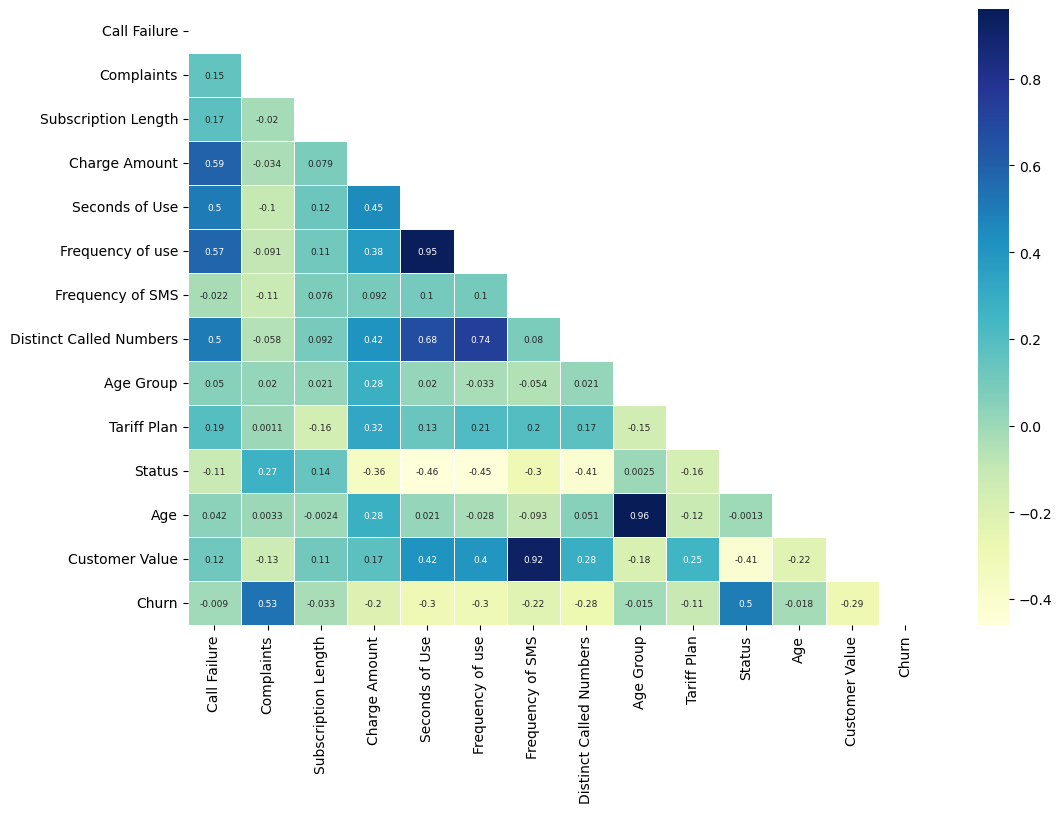

In [522]:
plt.figure(figsize=(12,8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df.corr(),cmap="YlGnBu",linewidths=0.5,annot=True,annot_kws={"size":6.5},mask=mask)

##### Highly positively or negatively correlated features with Churn: Status, Complaints, Distinct Numbers, Freq of use, Customer Value

##### Highly positively correlated pairs of features: Age group with age, Freq of use with seconds of use, Customer value with freq of sms

## Machine Learning Prediction Analysis

In [523]:
df['Churn'].value_counts(normalize=True)


0    0.842857
1    0.157143
Name: Churn, dtype: float64

[Text(0, 0, 'Churn'), Text(1, 0, 'No Churn')]

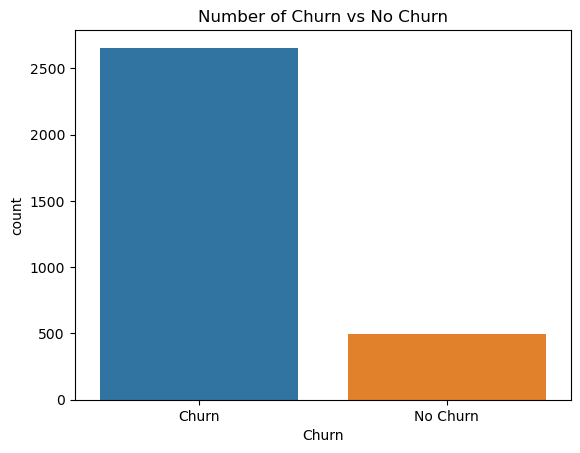

In [524]:
g=sns.countplot(data=df,x='Churn')
g.set_title('Number of Churn vs No Churn')
g.set_xticklabels(['Churn','No Churn'])

### Observation

##### This is a highly imbalance problem. About 85% of targets labels are 0, what means that this percentage didn't churn. 

##### So a Zero rate Classifier that always predict a "No Churn" scenary would have an accuracy score close to 85%! So Our predictor have to do it better than that.

## Machine learning model Definition

### Preprocessing the data

##### Drop redundant columns

In [525]:
# Drop Age Column (highly correlated with Age Group)
df=df.drop('Age',axis=1)

### Make new columns with the combination of others

In [526]:
# Make a column with the ratio of freq of SMS of the total use droping both columns ('Frequency of Use' and 'Frequency of SMS')
df['SMS ratio']=df['Frequency of SMS']/(df['Frequency of SMS'] + df['Frequency of use'])
df.loc[~np.isfinite(df['SMS ratio']), 'SMS ratio'] = 0
df=df.drop(['Frequency of SMS','Frequency of use'],axis=1)

### Convert seconds of use to categories according to bins

In [527]:
# Categorize Seconds of use in three distinct groups and drop Seconds of use
df['Seconds_Use_Group']=pd.qcut(df['Seconds of Use'],4,labels=False)
df=df.drop('Seconds of Use',axis=1)

In [528]:
df.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn,SMS ratio,Seconds_Use_Group
0,8,0,38,0,17,3,1,1,197.640,0,0.065789,2
1,0,0,39,0,4,2,1,2,46.035,0,0.583333,0
2,10,0,37,0,24,3,1,1,1536.520,0,0.856802,1
3,10,0,38,0,35,1,1,1,240.020,0,0.014925,2
4,3,0,38,0,33,1,1,1,145.805,0,0.033333,1


### Defining Target Variable and Features

In [529]:
X=df.drop('Churn',axis=1)
y=df['Churn']

### Basic Imports

In [530]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

### Instanciate Models

In [531]:
scaler=StandardScaler()
rf_clf=RandomForestClassifier()

In [532]:
rf_clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

### Define Pipeline

In [533]:
params_pipe = {
    "randomforestclassifier__n_estimators": [100, 250, 500],
    "randomforestclassifier__max_features": ['log2'],
    "randomforestclassifier__max_depth": [10, 15],
    "randomforestclassifier__min_samples_leaf": [2, 4, 10]
}


In [534]:
pipe=make_pipeline(scaler,rf_clf)

### Test and Training Sets

In [535]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42, stratify=y)

### Tuning the model

In [536]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_pipe = GridSearchCV(estimator=pipe,param_grid=params_pipe,cv=kf)


In [537]:
grid_pipe.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [10, 15],
                         'randomforestclassifier__max_features': ['log2'],
                         'randomforestclassifier__min_samples_leaf': [2, 4, 10],
                         'randomforestclassifier__n_estimators': [100, 250,
                                                                  500]})

### Best Model and Score

In [538]:
grid_pipe.best_params_

{'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__max_features': 'log2',
 'randomforestclassifier__min_samples_leaf': 2,
 'randomforestclassifier__n_estimators': 100}

In [539]:
grid_pipe.best_score_

0.9484126984126984

In [540]:
best_model=grid_pipe.best_estimator_
y_pred=best_model.predict(X_test)

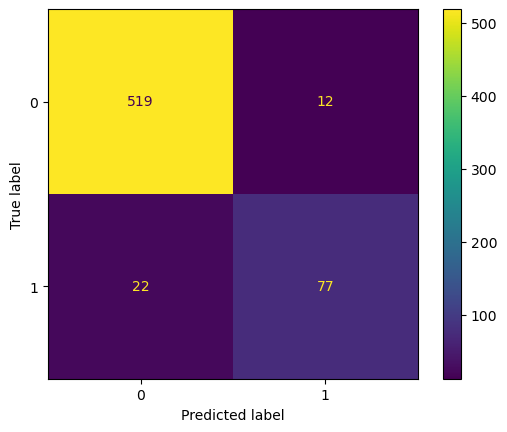

In [541]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [542]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       531
           1       0.87      0.78      0.82        99

    accuracy                           0.95       630
   macro avg       0.91      0.88      0.89       630
weighted avg       0.94      0.95      0.94       630



### Feature Influence - What Causes or its related with Churn?

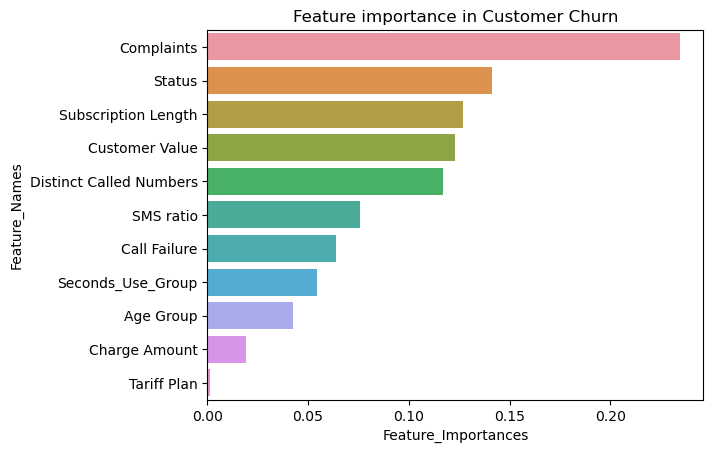

In [543]:
feature_importances = best_model.steps[1][1].feature_importances_
feature_names=X.columns
df_features=pd.DataFrame({'Feature_Names':feature_names,'Feature_Importances':feature_importances}).sort_values('Feature_Importances',ascending=False)
g=sns.barplot(data=df_features,x='Feature_Importances',y='Feature_Names')
g.set_title('Feature importance in Customer Churn')
plt.show()

## Final Conclusions

##### The Model performed better than the baseline comparison model with an accuracy of about 95% versus 85%. 

##### More important it correctly classified Customer Churn about 80% of the cases

##### The most influencial variables related with Churn are: Complains - Status- Susbscription Lenght - Customer Value - Distinct Called Numbers - SMS ratio and Call Failure

## Actions that could prevent Churn

#####  Run the model in the current group of Customers. 

##### Identify The customer situation in the likely Churn cases

##### Taking care on Complains, calling the customers and offering a compensation

##### Monitor Subcription Lenghts, because most of the Customers Churns appeared at about 32 to 38 months, and offering promotional discounts or benefits.

##### The benefits could have been decided by age group taking on acount SMS vs Calls frequency (see Graphs in Exploratory Analysis)
 
##### Tracking Call Failures if it is possible. When Call Failures exceed 5 contact the customer